## Digital MakeUp

We will detect landmarks and use landmarks to apply digital makeup on our image

### Installing Face Recognition Library

In [1]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=86ac3e58d464f130ea1ed15abe991366b7baac75b0eb0b13bec0de7c25ee5ec1
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


### Importing Required Modules

In [2]:
import PIL.Image
import PIL.ImageDraw
import face_recognition
import numpy as np
import requests
from io import BytesIO

## Images to use for Testing
https://images.pexels.com/photos/3184398/pexels-photo-3184398.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260
<br>
https://images.pexels.com/photos/3184291/pexels-photo-3184291.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260
<br>
https://images.pexels.com/photos/3184360/pexels-photo-3184360.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260
<br>
https://images.pexels.com/photos/3184351/pexels-photo-3184351.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260
<br>
https://images.pexels.com/photos/3183172/pexels-photo-3183172.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940
<br>
https://images.pexels.com/photos/4428041/pexels-photo-4428041.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260

#### To read image in files path

image = face_recognition.load_image_file('PATH HERE')

### Read Image from Image URL

In [3]:
url = "https://images.pexels.com/photos/3184398/pexels-photo-3184398.jpeg?auto=compress&cs=tinysrgb&h=750&w=1260"

In [4]:
response = requests.get(url)
image = np.array(PIL.Image.open(BytesIO(response.content)))

### Detect the faces in the Picture

It returns a list of detected faces with top, left, bottom and right pixel value of each face

In [5]:
face_landmarks = face_recognition.face_landmarks(image)

In [6]:
num_of_faces = len(face_landmarks)
print(f"Found {num_of_faces} number of faces in photo")

Found 6 number of faces in photo


### Converting Array back to PIL Image

In [7]:
pil_image = PIL.Image.fromarray(image)

### Make a PIL Draw Object

In [8]:
draw = PIL.ImageDraw.Draw(pil_image)

### Drawing Rectangle for each Face

In [13]:
for face_landmark in face_landmarks:
  draw.line(face_landmark['left_eyebrow'], fill = (128, 0, 128, 100), width = 3)
  draw.line(face_landmark['right_eyebrow'], fill = (128, 0, 128, 100), width = 3)

  draw.polygon(face_landmark['top_lip'], fill = (0, 128, 128, 100))
  draw.polygon(face_landmark['bottom_lip'], fill = (0, 128, 128, 100))

### Output

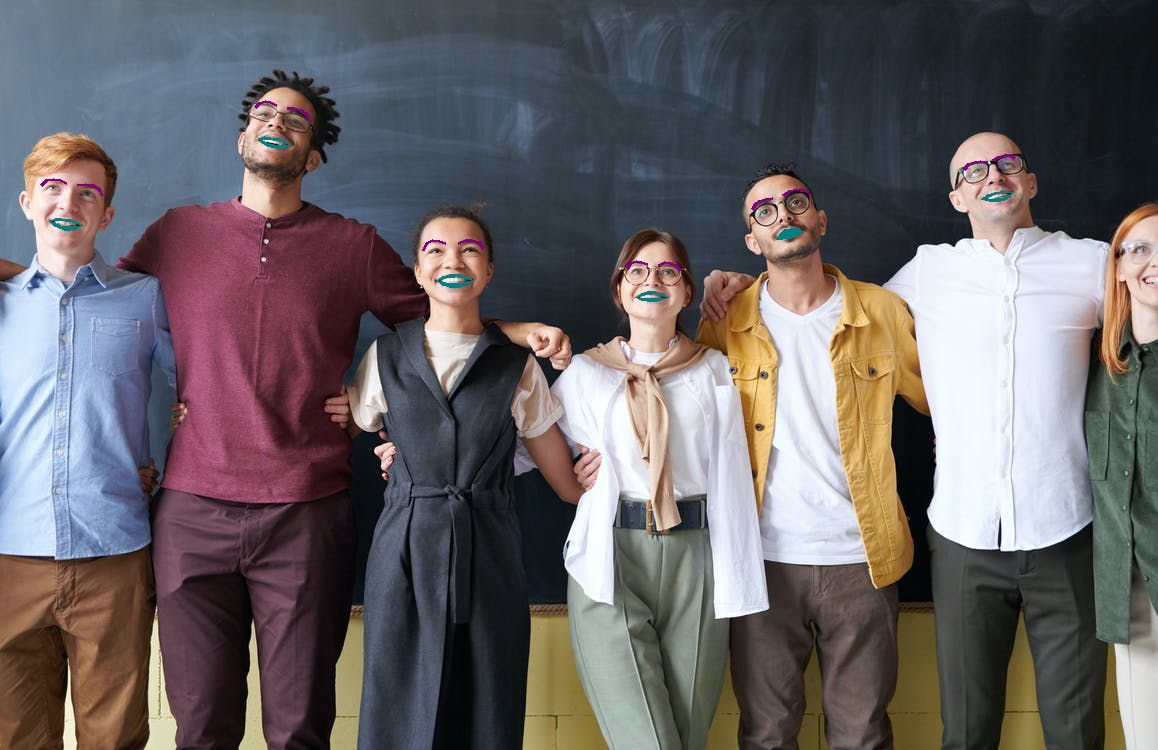

In [14]:
pil_image